# SOK-1006 V25
## Løsning til arbeidskrav 6 og 7 - Detaljhandel i Norge: Estimering av en produkt- og tilbudsfunksjon

Tilpasset fra mappeoppgave 2 v24.



### 1. Bakgrunn

Detaljhandel beskriver salg av varer til individer eller husholdninger. Her er en overskrift fra [Dagens Næringsliv, 27. mars 2024](https://www.dn.no/handel/ssb/shopping/marginal-oppgang-for-detaljhandelen/2-1-1618069)            


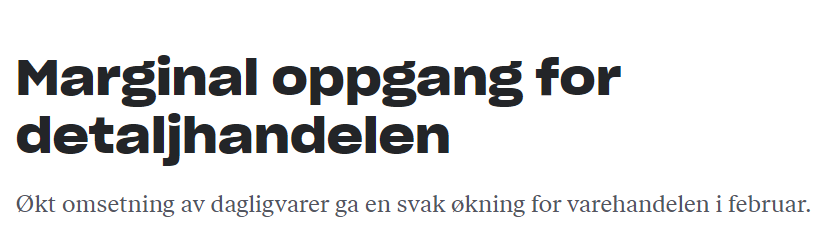

Her nevnes både varehandelen, detaljhandelen og dagligvarer i samme sak. For å vite hvordan disse begrepene henger sammen må man vite noe om [Næringsgruppering](https://www.ssb.no/klass/klassifikasjoner/6/koder). Denne lenken fører til Næringsgrupperingen som brukes i Norge (SN2007). I kategori G finner man "Varehandel, reparasjon av motorvogner", og dersom du utvider gruppe G får man 3 nye undergrupper. Vi er interessert i undergruppe 47 - Detaljhandel, unntatt med motorvogner. Dersom du klikker på plusstegnet ved siden av tallet 47 får du opp nye undergrupper, og laveste gruppe beskrives med fem siffer. Ved å trykke på "i" ikonet kan du få informasjon om hva hver gruppe inneholder.       

I denne oppgaven skal vi estimere en produktfunksjon for detaljhandelen.





### Oppgave 1 - Kartlegging av detaljhandel i Norge

Hva menes med varehandel og detaljhandel?      


### Oppgave 2 - Produktfunksjon for detaljhandel

I denne oppgaven skal du estimere en produktfunksjon for detaljhandel i Norge. Vi antar at produktfunksjonen tar Cobb-Douglas form:

\begin{equation}
   x = ZN^aK^{b}\;\;(1)
\end{equation}


hvor $x$ er enheter ferdigprodukt, $N$ er enheter arbeidskraft, $K$ er enheter kapital og $Z>0, a>0, b>0$ er konstante tall.



[Tabell 12910, SSB](https://www.ssb.no/statbank/table/12910/) inneholder data etter næring på blant annet Produksjonsverdi, Lønnskostnader og Bruttoinvesteringer (alle i mill NOK). Følgende kode kan brukes for å laste ned disse dataene for detaljhandel for 2022.

In [2]:
# last inn pakker

import json
import pandas as pd
import requests
from pyjstat import pyjstat

# Lim in PostUrl som spørringen skal postes mot
postUrl = "https://data.ssb.no/api/v0/no/table/12910/"

# spørring fra SSB

apiQuery = {
  "query": [
    {
      "code": "NACE2007",
      "selection": {
        "filter": "vs:NACE2007StrNaringUndGr",
        "values": [
          "47.111",
          "47.112",
          "47.190",
          "47.210",
          "47.220",
          "47.230",
          "47.241",
          "47.242",
          "47.251",
          "47.259",
          "47.260",
          "47.291",
          "47.292",
          "47.299",
          "47.300",
          "47.410",
          "47.420",
          "47.430",
          "47.510",
          "47.521",
          "47.522",
          "47.523",
          "47.524",
          "47.529",
          "47.531",
          "47.532",
          "47.533",
          "47.540",
          "47.591",
          "47.592",
          "47.593",
          "47.594",
          "47.599",
          "47.610",
          "47.620",
          "47.630",
          "47.641",
          "47.642",
          "47.650",
          "47.710",
          "47.721",
          "47.722",
          "47.730",
          "47.740",
          "47.750",
          "47.761",
          "47.762",
          "47.771",
          "47.772",
          "47.781",
          "47.782",
          "47.789",
          "47.791",
          "47.792",
          "47.799",
          "47.810",
          "47.820",
          "47.890",
          "47.911",
          "47.912",
          "47.913",
          "47.914",
          "47.915",
          "47.916",
          "47.917",
          "47.919",
          "47.990"
        ]
      }
    },
    {
      "code": "ContentsCode",
      "selection": {
        "filter": "item",
        "values": [
          "Produksjonsverdi",
          "Lonnskost",
          "BruttoInvesteringer"
        ]
      }
    },
    {
      "code": "Tid",
      "selection": {
        "filter": "item",
        "values": [
          "2022"
        ]
      }
    }
  ],
  "response": {
    "format": "json-stat2"
  }
}


# Funksjon for å konvertere uttrekket til 2 dataframes, tar 2 paramtre (SSB)

def apiToDataframe(postUrl, query):

    # postUrl som spørringen skal postes mot
    # Spørringen og endepunktet til API-et kan hentes fra Statistikkbanken.

    res = requests.post(postUrl, json=query)
    # legger resultat i ds. DS har i tillegg en del metadata
    ds = pyjstat.Dataset.read(res.text)
    # skriver resultatet til to dataframes
    # først dataframe med tekst
    df = ds.write('dataframe')
    # deretter dataframe med koder
    df_id = ds.write('dataframe', naming='id')
    # returnerer også ds i tilfelle en trenger metadata
    return df, df_id, ds


df, df_id, ds = apiToDataframe(postUrl, apiQuery)

df

,næring (SN2007),foretak/bedrift,statistikkvariabel,år,value
0,Butikkhandel med bredt vareutvalg med hovedvek...,Foretak (hovedenheter),Produksjonsverdi (mill. kr),2022,52149.6
1,Butikkhandel med bredt vareutvalg med hovedvek...,Foretak (hovedenheter),Lønnskostnader (mill. kr),2022,22215.3
2,Butikkhandel med bredt vareutvalg med hovedvek...,Foretak (hovedenheter),Bruttoinvesteringer (mill. kr),2022,3807.0
3,Butikkhandel med bredt vareutvalg med hovedvek...,Bedrifter (underenheter),Produksjonsverdi (mill. kr),2022,49435.7
4,Butikkhandel med bredt vareutvalg med hovedvek...,Bedrifter (underenheter),Lønnskostnader (mill. kr),2022,21116.2
...,...,...,...,...,...
397,Detaljhandel utenom utsalgssted ellers,Foretak (hovedenheter),Lønnskostnader (mill. kr),2022,532.4
398,Detaljhandel utenom utsalgssted ellers,Foretak (hovedenheter),Bruttoinvesteringer (mill. kr),2022,83.3
399,Detaljhandel utenom utsalgssted ellers,Bedrifter (underenheter),Produksjonsverdi (mill. kr),2022,1611.6
400,Detaljhandel utenom utsalgssted ellers,Bedrifter (underenheter),Lønnskostnader (mill. kr),2022,532.0


### Oppgave 2 fortsetter

Datasettet inneholder to rader for hver underkategori (én verdi for foretak, og én for bedrifter). Vi skal slå disse verdiene sammen, droppe et par overflødige kolonner, samt pivot slik at vi ender opp med et datasett som jeg har kalt `data`. (Jeg har også fjernet observasjoner som er null).



In [3]:
# slå sammen verdier for foretak og bedrift

df_sum = df.groupby(['næring (SN2007)', 'statistikkvariabel']).sum().reset_index()

# dropp kolonner

df_sum = df_sum.drop(columns=['foretak/bedrift', 'år'])

# pivot

df_pivot = df_sum.pivot_table(index='næring (SN2007)', columns='statistikkvariabel', values='value')

# lag en kopi av datasettet

data = df_pivot.copy()

# fjern rader med verdier lik 0

data = data.drop(data[data.eq(0).any(axis=1)].index)

#vis datasettet

data

statistikkvariabel,Bruttoinvesteringer (mill. kr),Lønnskostnader (mill. kr),Produksjonsverdi (mill. kr)
næring (SN2007),,,
Butikkhandel ikke nevnt annet sted,189.3,2331.1,5892.0
Butikkhandel med antikviteter,0.1,30.4,110.1
Butikkhandel med apotekvarer,311.9,10713.4,18990.5
Butikkhandel med audio- og videoutstyr,31.6,398.8,848.6
Butikkhandel med bakervarer og konditorvarer,62.2,1282.5,2792.3
...,...,...,...
Postordre-/Internetthandel med helsekost,12.2,248.1,2111.4
"Postordre-/Internetthandel med tekstiler, utstyrsvarer, klær, skotøy, reiseeffekter og lærvarer",109.4,1137.9,6152.3
"Postordre-/internetthandel med bøker, papir, aviser og blader",6.1,114.6,483.2


### Oppgave 2 fortsetter

Nå har vi et datasett med 61 observasjoner på 3 variabler.        

i) Bruk datasettet til å estimere $Z>0, a>0, b>0$ i (1), og forklar nøye hva hvert tall representerer. Forklar nøye hvordan du evt transformerer (1) før du estimerer.        

ii) Hva menes med skalautbytte, og hvordan kan man avgjøre skalautbytte for en produktfunksjon av type Cobb-Douglas?      

iii) Hvilken skalaegenskap har produktfunksjonen for detaljhandel som du har estimert? Hvordan forklarer du dette (dvs er svaret intuitivt rimelig utfra type næring som vanligvis har denne type skalautbytte)?          

iv) Hvilke svakheter har denne analysen?


# Løsningsforslag

In [4]:
import numpy as np

data['lnQ'] = np.log(data['Produksjonsverdi (mill. kr)'])
data['lnL'] = np.log(data['Lønnskostnader (mill. kr)'])
data['lnK'] = np.log(data['Bruttoinvesteringer (mill. kr)'])


data

statistikkvariabel,Bruttoinvesteringer (mill. kr),Lønnskostnader (mill. kr),Produksjonsverdi (mill. kr),lnQ,lnL,lnK
næring (SN2007),,,,,,
Butikkhandel ikke nevnt annet sted,189.3,2331.1,5892.0,8.681351,7.754096,5.243333
Butikkhandel med antikviteter,0.1,30.4,110.1,4.701389,3.414443,-2.302585
Butikkhandel med apotekvarer,311.9,10713.4,18990.5,9.851694,9.279251,5.742683
Butikkhandel med audio- og videoutstyr,31.6,398.8,848.6,6.743588,5.988460,3.453157
Butikkhandel med bakervarer og konditorvarer,62.2,1282.5,2792.3,7.934621,7.156567,4.130355
...,...,...,...,...,...,...
Postordre-/Internetthandel med helsekost,12.2,248.1,2111.4,7.655107,5.513832,2.501436
"Postordre-/Internetthandel med tekstiler, utstyrsvarer, klær, skotøy, reiseeffekter og lærvarer",109.4,1137.9,6152.3,8.724581,7.036940,4.695011
"Postordre-/internetthandel med bøker, papir, aviser og blader",6.1,114.6,483.2,6.180431,4.741448,1.808289


In [5]:
import statsmodels.formula.api as smf



# Estimer ved hjelp av ols.

mod = smf.ols(formula='lnQ ~ lnL + lnK', data=data)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                    lnQ   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     522.2
Date:                Mon, 31 Mar 2025   Prob (F-statistic):           8.16e-38
Time:                        10:22:22   Log-Likelihood:                -27.062
No. Observations:                  61   AIC:                             60.12
Df Residuals:                      58   BIC:                             66.46
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.5837      0.290      5.465      0.0

In [20]:
Z_num=np.exp(res.params['Intercept'])
print("Estimert Z er",  Z_num)

Estimert Z er 4.872718672080032


In [22]:
print("Estimert verdi på a er", res.params['lnL'])
print("Estimert verdi på b er", res.params['lnK'])

Estimert verdi på a er 0.8087532932532764
Estimert verdi på b er 0.1512510989592782


In [ ]:
# test for skalautbytte (Ren & Jie forelesning 10)


data['lnKperL']=data['lnK']-data['lnL']
data['lnqperL']=data['lnQ']-data['lnL']

# Estimer ved hjelp av ols.

mod1 = smf.ols(formula='lnqperL ~ lnL + lnKperL', data=data)
res1 = mod1.fit()
print(res1.summary())

                            OLS Regression Results                            
Dep. Variable:                lnqperL   R-squared:                       0.108
Model:                            OLS   Adj. R-squared:                  0.077
Method:                 Least Squares   F-statistic:                     3.514
Date:                Mon, 31 Mar 2025   Prob (F-statistic):             0.0363
Time:                        10:22:22   Log-Likelihood:                -27.062
No. Observations:                  61   AIC:                             60.12
Df Residuals:                      58   BIC:                             66.46
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.5837      0.290      5.465      0.0

Koeffisienten på lnL er a+b-1. Dersom dette er lik 0, så er det konstant skalautbytte. Dersom det er større enn 0, så er det stigende skalautbytte, og dersom det er mindre enn 0 så er det fallende skalautbytte. Her ser vi at koeffisienten er -0.0400 med en p-verdi på 0.202 som er veldig høyt. Vi konkluderer med at a+b-1=0 statistisk sett, dvs a+b=1 og bransjen viser konstant skalautbytte.

## Bedriftens tilbudsfunksjon - arbeidskrav 7

### Oppgave - Tilbud til en gjennomsnittlig bedrift


Butikken "Helt midt på treet" er en ganske *gjennomsnittlig* bedrift i en bransje i detaljhandelen. I denne sammenhengen betyr gjennomsnittlig følgende:       

- $Z, a, b$ som du fant i arbeidskrav 6 beskriver produktfunksjonen til bedriften.
- Én timeslønn i denne bedriften tilsvarer gjennomsnittet for detaljhandelen.
- På kort sikt har bedriften kapitalutgifter som tilsvarer gjennomsnittet for detaljhandelen.

I praksis betyr dette at du kan bruke dine estimat på $Z, a, b$ (ta 2 desimalplasser) som bedriftens produktfunksjon i (1), at timelønna er 287 kr i 2022, og at kapitalutgiften er gjennomsnittet av det som du har i datasettet (som du må finne - last ned data ved å kjøre koden fra arbeidskrav 6). (Tabell 11421, SSB gir gjennomsnittlig månedslønn i 2022 for en ansatt i gruppe 47 Detaljhandel som 41 290 kr. SSB sier videre at en ansatt i full stilling arbeider 230 dager i året, som utgjør 19.2 dager i snitt pr måned, eller (19.2*7.5=) 144 timer pr måned).          

Vi går ut fra at "Helt midt på treet" har følgende produktfunksjon:


\begin{equation}
   y = ZL^aK_0^{b}\;\;(2)
\end{equation}

Her er $y$ *antall enheter produsert*, $L$ *antall timer arbeidskraft*, mens $K_0$ er kapitalutgiften til bedriften i mill. NOK. (Legg merke til at vi nå blander fysiske og monetære enheter).          

i) Skriv et uttrykk for bedriftens variable kostnader og totale kostnader på kort sikt som en funksjon av mengde produsert ($y$). (Som vi har sett før har Sympy problemer med å løse ligninger av formen $Y=\alpha X^\beta$ for $X$. Dette kan vi løse selv som $X=(\frac{Y}{\alpha})^{\frac{1}{\beta}}$).       

ii) Finn uttrykk for bedriftens grensekostnad og gjennomsnittskostnad (total og variabel).        

iii) Bruk ditt svar til ii) for å tegne bedriftens tilbudskurve i en figur. Forklar figuren nøye.        

iv) Anta at lønnsoppgjøret gir arbeidere i "Helt midt på treet" en lønnsøkning på 5%. Vis hvordan dette påvirker bedriftens tilbud, og forklar intuisjonen bak endringen.



In [7]:
# gjennomsnittlig kapitalutgift

average_bruttoinvesteringer = data['Bruttoinvesteringer (mill. kr)'].mean()
average_bruttoinvesteringer


271.2737704918033

In [8]:

import sympy as sp


# definer symboler
x,N,p, w= sp.symbols('x N p w', positive=True, real=True) 

# definer prodfn

Z_est=np.exp(res.params['Intercept'])
Z = np.round(Z_est,2)
A= A= np.round(float(res.params['lnL']),2)
B=np.round(float(res.params['lnK']),2)
K = np.round(average_bruttoinvesteringer,2)

def prod_ks(N):
    return Z*N**A*K**B

prod_ks(N)



11.2859787008085*N**0.81

In [9]:
# løs x=f(N)
# N_ks = sp.solve(prod_ks(N)-x,N)[0]
# N_ks

# Python løser ikke dette

# løs direkte

N_ks = (x/11.29)**(1/.81)
N_ks

0.0501623471584149*x**1.23456790123457

In [10]:

# total kostnad
def Kostnad(w,N):
    return K+w*N_ks

Kostnad_utg = Kostnad(287, N_ks)

Kostnad_utg




14.3965936344651*x**1.23456790123457 + 271.27

In [11]:
# tilbudet gis av p=GK
GK = sp.diff(Kostnad_utg, x)
GK
print('tilbud: p= ',GK)

tilbud: p=  17.7735723882285*x**0.234567901234568


In [12]:
# vi gjør klart for å plotte
Kostnad_fn=sp.lambdify(x, Kostnad_utg)

GK_fn=sp.lambdify(x, GK)

display(Kostnad_fn(x))
display(GK_fn(x))

14.3965936344651*x**1.23456790123457 + 271.27

17.7735723882285*x**0.234567901234568

In [13]:
# gjennomsnittskostnad

#var
def AC_var(x):
    return (Kostnad_fn(x)-K)/x


AC_var(x)


14.3965936344651*x**0.23456790123457

In [14]:
# total

def AC(x):
    return Kostnad_fn(x)/x
# finn lavest x som gir positiv fortjeneste, dvs reservasjonsprisen

lavest_x=sp.solve(AC(x)-GK_fn(x),x)[0]
lavest_x

34.9098100437598

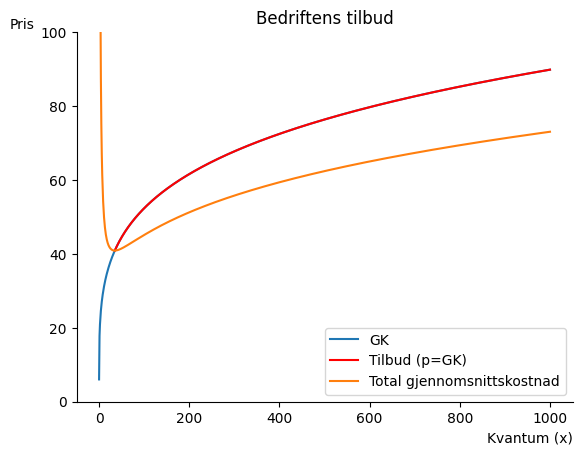

In [15]:
from matplotlib import pyplot as plt

x_num=np.linspace(0.01,1000,1000)
x_1=np.linspace(float(lavest_x),1000,1000)
fig, ax = plt.subplots()
ax.set_ylabel('Pris', loc='top', rotation =0)
ax.set_xlabel('Kvantum (x)', loc='right')
#ax.set(xlim=(0,20))
ax.set(ylim=(0,100))
ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')

ax.plot(x_num, GK_fn(x_num), label = 'GK')
ax.plot(x_1, GK_fn(x_1), color='red', label = 'Tilbud (p=GK)')
ax.plot(x_num, AC(x_num), label = 'Total gjennomsnittskostnad')


ax.set_title('Bedriftens tilbud')
ax.legend(loc='best');

In [16]:
# økning i lønn med 5%

Kostnad_ny = Kostnad((1.05*287), N_ks)

Kostnad_ny

15.1164233161883*x**1.23456790123457 + 271.27

In [17]:
GK_ny = sp.diff(Kostnad_ny, x)
GK_ny
print('tilbud: p= ',GK_ny)

tilbud: p=  18.6622510076399*x**0.234567901234568


In [18]:
# vi gjør klart for å plotte
Kostnad_fn_ny=sp.lambdify(x, Kostnad_ny)

GK_fn_ny=sp.lambdify(x, GK_ny)

def AC_ny(x):
    return Kostnad_fn_ny(x)/x
# finn lavest x som gir positiv fortjeneste, dvs reservasjonsprisen

lavest_x_ny=sp.solve(AC_ny(x)-GK_fn_ny(x),x)[0]
lavest_x_ny

33.5570792396471

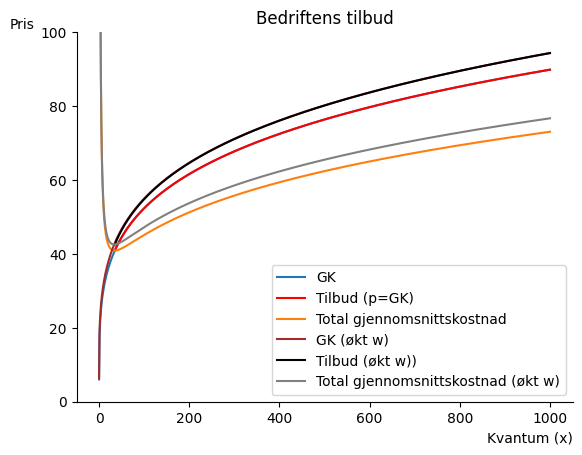

In [19]:
x_2=np.linspace(float(lavest_x_ny),1000,1000)

ax.plot(x_num, GK_fn_ny(x_num), color = 'brown', label = 'GK (økt w)')
ax.plot(x_1, GK_fn_ny(x_2), color='black', label = 'Tilbud (økt w))')
ax.plot(x_num, AC_ny(x_num), color='grey', label = 'Total gjennomsnittskostnad (økt w)')

ax.set_title('Bedriftens tilbud')
ax.legend(loc='best')

fig